<a href="https://colab.research.google.com/github/gabrielfernandorey/GGGR/blob/main/Arboles/SRT%20v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SRT v3 - Ensayo
### Arboles de regresion - Datos reales

In [1]:
import random
import string
import pandas as pd
import numpy as np
from datetime import date

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


### Importamos Datos

In [2]:
!wget https://raw.githubusercontent.com/gabrielfernandorey/GGGR/main/Regresion%20lineal/cod_postal_series.csv

--2023-05-05 14:42:33--  https://raw.githubusercontent.com/gabrielfernandorey/GGGR/main/Regresion%20lineal/cod_postal_series.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2977660 (2.8M) [text/plain]
Saving to: ‘cod_postal_series.csv.2’

cod_postal_series.c 100%[===================>]   2.84M  --.-KB/s    in 0.07s   

2023-05-05 14:42:34 (41.2 MB/s) - ‘cod_postal_series.csv.2’ saved [2977660/2977660]



In [3]:
df = pd.read_csv('/content/cod_postal_series.csv', header=0,
                 names=['codigo','año','mes','total_cp'],
                 dtype={'codigo': str, 'año': str, 'mes': str, 'total_cp': str})

In [4]:
df.head()

,codigo,año,mes,total_cp
0,0,2022.0,1,208
1,0,2022.0,2,185
2,0,2022.0,3,289
3,0,2022.0,4,177
4,0,2022.0,5,177


### EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147066 entries, 0 to 147065
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   codigo    147066 non-null  object
 1   año       147066 non-null  object
 2   mes       147066 non-null  object
 3   total_cp  147066 non-null  object
dtypes: object(4)
memory usage: 4.5+ MB


#### Ajustamos tipo de datos

In [6]:
df['año'] = pd.to_numeric(df['año'], downcast='integer') #corregimos el formato de la columna 

In [7]:
df['mes'] = pd.to_numeric(df['mes']) #corregimos el formato de la columna 

In [8]:
df['total_cp'] = pd.to_numeric(df['total_cp']) #corregimos el formato de la columna 

In [9]:
df.dtypes

codigo      object
año          int16
mes          int64
total_cp     int64
dtype: object

In [10]:
df.head()

,codigo,año,mes,total_cp
0,0,2022,1,208
1,0,2022,2,185
2,0,2022,3,289
3,0,2022,4,177
4,0,2022,5,177


In [11]:
df = df.sort_values(['año','mes'], ascending=True)
df

,codigo,año,mes,total_cp
0,0,2022,1,208
33,01000000,2022,1,19
49,01001000,2022,1,172
65,01002000,2022,1,20
81,01003000,2022,1,7
...,...,...,...,...
146965,Z9050DJG,2023,4,1
146969,Z9303XAT,2023,4,1
146971,Z9310BDE,2023,4,1
146990,Z9400BJA,2023,4,1


#### Verificar cuantos registros tienen el codpos menor a 8 caracteres

In [12]:
df_codigo = df.loc[df['codigo'].apply(lambda x: len(str(x)) < 8)]

#### Verificamos cantidad de registros por codigo

In [13]:
codigos = df.value_counts('codigo')

In [14]:
mayores_a_15 = codigos[codigos > 15]

In [15]:
df = df[df['codigo'].isin(mayores_a_15.index)]

In [16]:
df

,codigo,año,mes,total_cp
0,0,2022,1,208
33,01000000,2022,1,19
49,01001000,2022,1,172
65,01002000,2022,1,20
81,01003000,2022,1,7
...,...,...,...,...
146313,Y4604CJC,2023,4,7
146621,Y4610XAH,2023,4,3
146666,Y4612JYI,2023,4,5
146682,Y4612XAI,2023,4,4


### Transformacion

#### LabelEncoder

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
# Crear una instancia de OneHotEncoder
encoder = LabelEncoder()

In [19]:
# Codificar los valores alfanuméricos
X_encoded = encoder.fit_transform(df.codigo.values.reshape(-1,))

In [20]:
X_encoded.shape

(25440,)

In [21]:
pd.DataFrame(X_encoded)

,0
0,0
1,1
2,2
3,3
4,4
...,...
25435,1585
25436,1586
25437,1587
25438,1588


#### Embeddings

In [22]:
tamano_embedding = 50

In [23]:
matriz_embedding = np.random.rand(len(encoder.classes_), tamano_embedding)

In [24]:
matriz_embedding

array([[0.06480633, 0.13412588, 0.76662556, ..., 0.77562721, 0.31334842,
        0.24353482],
       [0.02108359, 0.03887115, 0.22758118, ..., 0.26082145, 0.22786438,
        0.68816116],
       [0.99289801, 0.00750406, 0.82707825, ..., 0.05823375, 0.45784583,
        0.16526409],
       ...,
       [0.26081646, 0.67609927, 0.21371999, ..., 0.25251093, 0.35723057,
        0.52083324],
       [0.74877248, 0.67218662, 0.46297918, ..., 0.6860492 , 0.0843182 ,
        0.63059774],
       [0.48774656, 0.02079585, 0.00837439, ..., 0.50828033, 0.65976173,
        0.02110894]])

In [25]:
encoder.classes_

array(['0', '01000000', '01001000', ..., 'Y4612JYI', 'Y4612XAI',
       'Z9050DJG'], dtype=object)

In [26]:
# Vectores de embeddings asociados a un valor por cada atributo
atributos_embeddings = matriz_embedding[X_encoded]

In [27]:
atributos_embeddings.shape

(25440, 50)

#### Verificacion embeddings

In [28]:
i = 0
encoder.classes_[i]

'0'

In [29]:
matriz_embedding[i]

array([0.06480633, 0.13412588, 0.76662556, 0.51447027, 0.67891593,
       0.11939427, 0.27694772, 0.54336832, 0.38823054, 0.66392408,
       0.3577545 , 0.02841886, 0.55121008, 0.66540685, 0.98914971,
       0.94389125, 0.44450898, 0.56577146, 0.62657544, 0.68172448,
       0.90125748, 0.26816126, 0.83598759, 0.29459116, 0.36816132,
       0.95341741, 0.43503746, 0.50931117, 0.70616088, 0.72884396,
       0.56479738, 0.72986599, 0.54575921, 0.12911468, 0.89843618,
       0.73087066, 0.50752202, 0.94663453, 0.22967323, 0.05048541,
       0.38223838, 0.64601572, 0.1995707 , 0.40977771, 0.58300728,
       0.71410885, 0.13855249, 0.77562721, 0.31334842, 0.24353482])

In [30]:
matriz_embedding.shape

(1590, 50)

#### Dataframe con datos de embeddings

In [31]:
# Creamos un nuevo dataframe con los valores del embedding
embedding_df = pd.DataFrame(matriz_embedding, columns=[f'emb_{i}' for i in range(matriz_embedding.shape[1])])

In [32]:
embedding_df

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_40,emb_41,emb_42,emb_43,emb_44,emb_45,emb_46,emb_47,emb_48,emb_49
0,0.064806,0.134126,0.766626,0.514470,0.678916,0.119394,0.276948,0.543368,0.388231,0.663924,...,0.382238,0.646016,0.199571,0.409778,0.583007,0.714109,0.138552,0.775627,0.313348,0.243535
1,0.021084,0.038871,0.227581,0.785395,0.385800,0.540314,0.348569,0.641875,0.517128,0.134631,...,0.629269,0.830852,0.066240,0.991372,0.289553,0.946458,0.939077,0.260821,0.227864,0.688161
2,0.992898,0.007504,0.827078,0.507854,0.974439,0.064286,0.754363,0.619926,0.513323,0.582379,...,0.920607,0.920942,0.874557,0.342064,0.351559,0.826950,0.174021,0.058234,0.457846,0.165264
3,0.574015,0.026455,0.173756,0.661395,0.561557,0.409160,0.690060,0.268847,0.996314,0.140486,...,0.547691,0.608786,0.411069,0.074312,0.449788,0.737063,0.168084,0.359832,0.745826,0.404080
4,0.884664,0.473648,0.817759,0.376150,0.019416,0.711002,0.861375,0.068529,0.134310,0.427991,...,0.307288,0.821859,0.116059,0.879953,0.568363,0.549877,0.657130,0.422152,0.307940,0.873703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,0.081631,0.993095,0.021393,0.707849,0.469675,0.751304,0.019528,0.078043,0.290375,0.476781,...,0.832985,0.085239,0.125676,0.129498,0.188629,0.385137,0.563338,0.847308,0.244860,0.007477
1586,0.150670,0.323572,0.317905,0.947007,0.068685,0.874257,0.891929,0.383153,0.055590,0.050875,...,0.177284,0.234600,0.128071,0.866394,0.466217,0.351446,0.712738,0.910041,0.230726,0.881147
1587,0.260816,0.676099,0.213720,0.778739,0.621519,0.289645,0.010014,0.649975,0.987639,0.407931,...,0.903909,0.510031,0.849031,0.217889,0.930976,0.575684,0.196893,0.252511,0.357231,0.520833
1588,0.748772,0.672187,0.462979,0.882270,0.400516,0.972881,0.482648,0.075517,0.433070,0.866281,...,0.926032,0.235935,0.621692,0.489711,0.160618,0.844853,0.097990,0.686049,0.084318,0.630598


In [33]:
embedding_df['codigo'] = encoder.classes_

In [34]:
# Utilizamos el codigo como indice (para joinear)
embedding_df = embedding_df.set_index('codigo')
embedding_df

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_40,emb_41,emb_42,emb_43,emb_44,emb_45,emb_46,emb_47,emb_48,emb_49
codigo,,,,,,,,,,,,,,,,,,,,,
0,0.064806,0.134126,0.766626,0.514470,0.678916,0.119394,0.276948,0.543368,0.388231,0.663924,...,0.382238,0.646016,0.199571,0.409778,0.583007,0.714109,0.138552,0.775627,0.313348,0.243535
01000000,0.021084,0.038871,0.227581,0.785395,0.385800,0.540314,0.348569,0.641875,0.517128,0.134631,...,0.629269,0.830852,0.066240,0.991372,0.289553,0.946458,0.939077,0.260821,0.227864,0.688161
01001000,0.992898,0.007504,0.827078,0.507854,0.974439,0.064286,0.754363,0.619926,0.513323,0.582379,...,0.920607,0.920942,0.874557,0.342064,0.351559,0.826950,0.174021,0.058234,0.457846,0.165264
01002000,0.574015,0.026455,0.173756,0.661395,0.561557,0.409160,0.690060,0.268847,0.996314,0.140486,...,0.547691,0.608786,0.411069,0.074312,0.449788,0.737063,0.168084,0.359832,0.745826,0.404080
01003000,0.884664,0.473648,0.817759,0.376150,0.019416,0.711002,0.861375,0.068529,0.134310,0.427991,...,0.307288,0.821859,0.116059,0.879953,0.568363,0.549877,0.657130,0.422152,0.307940,0.873703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Y4604CJC,0.081631,0.993095,0.021393,0.707849,0.469675,0.751304,0.019528,0.078043,0.290375,0.476781,...,0.832985,0.085239,0.125676,0.129498,0.188629,0.385137,0.563338,0.847308,0.244860,0.007477
Y4610XAH,0.150670,0.323572,0.317905,0.947007,0.068685,0.874257,0.891929,0.383153,0.055590,0.050875,...,0.177284,0.234600,0.128071,0.866394,0.466217,0.351446,0.712738,0.910041,0.230726,0.881147
Y4612JYI,0.260816,0.676099,0.213720,0.778739,0.621519,0.289645,0.010014,0.649975,0.987639,0.407931,...,0.903909,0.510031,0.849031,0.217889,0.930976,0.575684,0.196893,0.252511,0.357231,0.520833


In [35]:
# Utilizamos el codigo como indice (para joinear)
df = df.set_index('codigo')
df

,año,mes,total_cp
codigo,,,
0,2022,1,208
01000000,2022,1,19
01001000,2022,1,172
01002000,2022,1,20
01003000,2022,1,7
...,...,...,...
Y4604CJC,2023,4,7
Y4610XAH,2023,4,3
Y4612JYI,2023,4,5


In [36]:
df.total_cp.max()

5314

#### Transformar la variable de salida

In [37]:
mmscaler = MinMaxScaler()

In [38]:
df['total_cp'] = mmscaler.fit_transform(df['total_cp'].values.reshape(-1,1))

In [39]:
df.head()

,año,mes,total_cp
codigo,,,
0,2022,1,0.038961
01000000,2022,1,0.003388
01001000,2022,1,0.032185
01002000,2022,1,0.003576
01003000,2022,1,0.001129


#### Joins de Dataframes

In [40]:
df_join = embedding_df.join(df, lsuffix='_izq', rsuffix='_der')
df_join

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_43,emb_44,emb_45,emb_46,emb_47,emb_48,emb_49,año,mes,total_cp
codigo,,,,,,,,,,,,,,,,,,,,,
0,0.064806,0.134126,0.766626,0.514470,0.678916,0.119394,0.276948,0.543368,0.388231,0.663924,...,0.409778,0.583007,0.714109,0.138552,0.775627,0.313348,0.243535,2022,1,0.038961
0,0.064806,0.134126,0.766626,0.514470,0.678916,0.119394,0.276948,0.543368,0.388231,0.663924,...,0.409778,0.583007,0.714109,0.138552,0.775627,0.313348,0.243535,2022,2,0.034632
0,0.064806,0.134126,0.766626,0.514470,0.678916,0.119394,0.276948,0.543368,0.388231,0.663924,...,0.409778,0.583007,0.714109,0.138552,0.775627,0.313348,0.243535,2022,3,0.054207
0,0.064806,0.134126,0.766626,0.514470,0.678916,0.119394,0.276948,0.543368,0.388231,0.663924,...,0.409778,0.583007,0.714109,0.138552,0.775627,0.313348,0.243535,2022,4,0.033126
0,0.064806,0.134126,0.766626,0.514470,0.678916,0.119394,0.276948,0.543368,0.388231,0.663924,...,0.409778,0.583007,0.714109,0.138552,0.775627,0.313348,0.243535,2022,5,0.033126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z9050DJG,0.487747,0.020796,0.008374,0.399605,0.928749,0.478254,0.906986,0.651423,0.933286,0.315334,...,0.977866,0.049189,0.615973,0.305420,0.508280,0.659762,0.021109,2022,12,0.000188
Z9050DJG,0.487747,0.020796,0.008374,0.399605,0.928749,0.478254,0.906986,0.651423,0.933286,0.315334,...,0.977866,0.049189,0.615973,0.305420,0.508280,0.659762,0.021109,2023,1,0.000188
Z9050DJG,0.487747,0.020796,0.008374,0.399605,0.928749,0.478254,0.906986,0.651423,0.933286,0.315334,...,0.977866,0.049189,0.615973,0.305420,0.508280,0.659762,0.021109,2023,2,0.000941


#### Datos de entrenamiento

In [41]:
df_final = df_join.reset_index()
df_final

,codigo,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,...,emb_43,emb_44,emb_45,emb_46,emb_47,emb_48,emb_49,año,mes,total_cp
0,0,0.064806,0.134126,0.766626,0.514470,0.678916,0.119394,0.276948,0.543368,0.388231,...,0.409778,0.583007,0.714109,0.138552,0.775627,0.313348,0.243535,2022,1,0.038961
1,0,0.064806,0.134126,0.766626,0.514470,0.678916,0.119394,0.276948,0.543368,0.388231,...,0.409778,0.583007,0.714109,0.138552,0.775627,0.313348,0.243535,2022,2,0.034632
2,0,0.064806,0.134126,0.766626,0.514470,0.678916,0.119394,0.276948,0.543368,0.388231,...,0.409778,0.583007,0.714109,0.138552,0.775627,0.313348,0.243535,2022,3,0.054207
3,0,0.064806,0.134126,0.766626,0.514470,0.678916,0.119394,0.276948,0.543368,0.388231,...,0.409778,0.583007,0.714109,0.138552,0.775627,0.313348,0.243535,2022,4,0.033126
4,0,0.064806,0.134126,0.766626,0.514470,0.678916,0.119394,0.276948,0.543368,0.388231,...,0.409778,0.583007,0.714109,0.138552,0.775627,0.313348,0.243535,2022,5,0.033126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25435,Z9050DJG,0.487747,0.020796,0.008374,0.399605,0.928749,0.478254,0.906986,0.651423,0.933286,...,0.977866,0.049189,0.615973,0.305420,0.508280,0.659762,0.021109,2022,12,0.000188
25436,Z9050DJG,0.487747,0.020796,0.008374,0.399605,0.928749,0.478254,0.906986,0.651423,0.933286,...,0.977866,0.049189,0.615973,0.305420,0.508280,0.659762,0.021109,2023,1,0.000188
25437,Z9050DJG,0.487747,0.020796,0.008374,0.399605,0.928749,0.478254,0.906986,0.651423,0.933286,...,0.977866,0.049189,0.615973,0.305420,0.508280,0.659762,0.021109,2023,2,0.000941
25438,Z9050DJG,0.487747,0.020796,0.008374,0.399605,0.928749,0.478254,0.906986,0.651423,0.933286,...,0.977866,0.049189,0.615973,0.305420,0.508280,0.659762,0.021109,2023,3,0.000000


In [42]:
X_data = df_final.drop(['codigo','total_cp'], axis=1).to_numpy()

In [43]:
X_data.shape

(25440, 52)

In [44]:
y_data = df_final['total_cp'].to_numpy()

In [45]:
y_data

array([0.03896104, 0.03463203, 0.05420666, ..., 0.00094109, 0.        ,
       0.        ])

In [46]:
X_train, X_test, y_train, y_test = train_test_split( X_data, y_data, test_size=0.30, random_state=43) 

### Modelo

In [90]:
regr_1 = RandomForestRegressor(max_depth=15, min_samples_split=3, min_samples_leaf=3)

### Entrenamiento

In [91]:
regr_1.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=3, min_samples_split=3)

### Validacion

In [92]:
pred_1_train = regr_1.predict(X_train)
pred_1_test = regr_1.predict(X_test)

In [93]:
mse_1_train = mean_squared_error(y_train, pred_1_train)
mse_1_test  = mean_squared_error(y_test, pred_1_test)

In [94]:
mse_1_train, mse_1_test

(0.00010440654639303797, 7.52843002081028e-05)

In [95]:
rmse_1_train = np.sqrt(mse_1_train)
rmse_1_test  = np.sqrt(mse_1_test)
print('RMSE:', round(rmse_1_train,4), round(rmse_1_test,4))

RMSE: 0.0102 0.0087


In [96]:
score_1 = r2_score(y_test, pred_1_test)
print(f'R2 score: {score_1:.5f}')

R2 score: 0.62776


### Prediccion

In [125]:
# Ingresar codigo
codigo_in = random.choice(encoder.classes_) 
new_codigo_in = encoder.transform([codigo_in])
new_codigo_embedding = matriz_embedding[new_codigo_in]


In [126]:
# Ingresar año y mes
anio_in = 2023
mes_in = 6

In [127]:
atributos_in = np.concatenate((new_codigo_embedding, anio_in, mes_in), axis=None)

In [128]:
atributos_in = atributos_in.reshape(1, 52)

In [129]:
pred = regr_1.predict(atributos_in)

In [130]:
pred = mmscaler.inverse_transform(pred.reshape(-1, 1))

In [131]:
print(f"Prediccion para el código {codigo_in} Año {anio_in} Mes {mes_in}: {np.round(pred[0][0],2)} incidentes")  

Prediccion para el código 08353000 Año 2023 Mes 6: 17.92 incidentes


### Verificacion grafica

In [132]:
filtro = df_final['codigo'] == codigo_in
df_filtrado = df_final[filtro]
df_filtrado

,codigo,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,...,emb_43,emb_44,emb_45,emb_46,emb_47,emb_48,emb_49,año,mes,total_cp
9360,08353000,0.362911,0.89395,0.737431,0.842661,0.295554,0.253296,0.925145,0.024818,0.283371,...,0.858047,0.861248,0.077738,0.763964,0.333008,0.376147,0.685248,2022,1,0.003576
9361,08353000,0.362911,0.89395,0.737431,0.842661,0.295554,0.253296,0.925145,0.024818,0.283371,...,0.858047,0.861248,0.077738,0.763964,0.333008,0.376147,0.685248,2022,2,0.001694
9362,08353000,0.362911,0.89395,0.737431,0.842661,0.295554,0.253296,0.925145,0.024818,0.283371,...,0.858047,0.861248,0.077738,0.763964,0.333008,0.376147,0.685248,2022,3,0.001318
9363,08353000,0.362911,0.89395,0.737431,0.842661,0.295554,0.253296,0.925145,0.024818,0.283371,...,0.858047,0.861248,0.077738,0.763964,0.333008,0.376147,0.685248,2022,4,0.001882
9364,08353000,0.362911,0.89395,0.737431,0.842661,0.295554,0.253296,0.925145,0.024818,0.283371,...,0.858047,0.861248,0.077738,0.763964,0.333008,0.376147,0.685248,2022,5,0.003953
9365,08353000,0.362911,0.89395,0.737431,0.842661,0.295554,0.253296,0.925145,0.024818,0.283371,...,0.858047,0.861248,0.077738,0.763964,0.333008,0.376147,0.685248,2022,6,0.001882
9366,08353000,0.362911,0.89395,0.737431,0.842661,0.295554,0.253296,0.925145,0.024818,0.283371,...,0.858047,0.861248,0.077738,0.763964,0.333008,0.376147,0.685248,2022,7,0.001506
9367,08353000,0.362911,0.89395,0.737431,0.842661,0.295554,0.253296,0.925145,0.024818,0.283371,...,0.858047,0.861248,0.077738,0.763964,0.333008,0.376147,0.685248,2022,8,0.001129
9368,08353000,0.362911,0.89395,0.737431,0.842661,0.295554,0.253296,0.925145,0.024818,0.283371,...,0.858047,0.861248,0.077738,0.763964,0.333008,0.376147,0.685248,2022,9,0.002259
9369,08353000,0.362911,0.89395,0.737431,0.842661,0.295554,0.253296,0.925145,0.024818,0.283371,...,0.858047,0.861248,0.077738,0.763964,0.333008,0.376147,0.685248,2022,10,0.001318


In [133]:
df_filtrado = df_filtrado.sort_values(['año','mes'], ascending=True)

In [134]:
fechas = []
totales = []

for row in df_filtrado.iterrows():
    fechas.append(str(row[1][51])+'-'+str(row[1][52])+'-01')
    totales.append(row[1][53])

In [135]:
fechas[0]

'2022-1-01'

In [136]:
totales = mmscaler.inverse_transform([totales])

In [137]:
df_graf = pd.DataFrame({'fechas':fechas, 'totales':totales.reshape(-1,)})

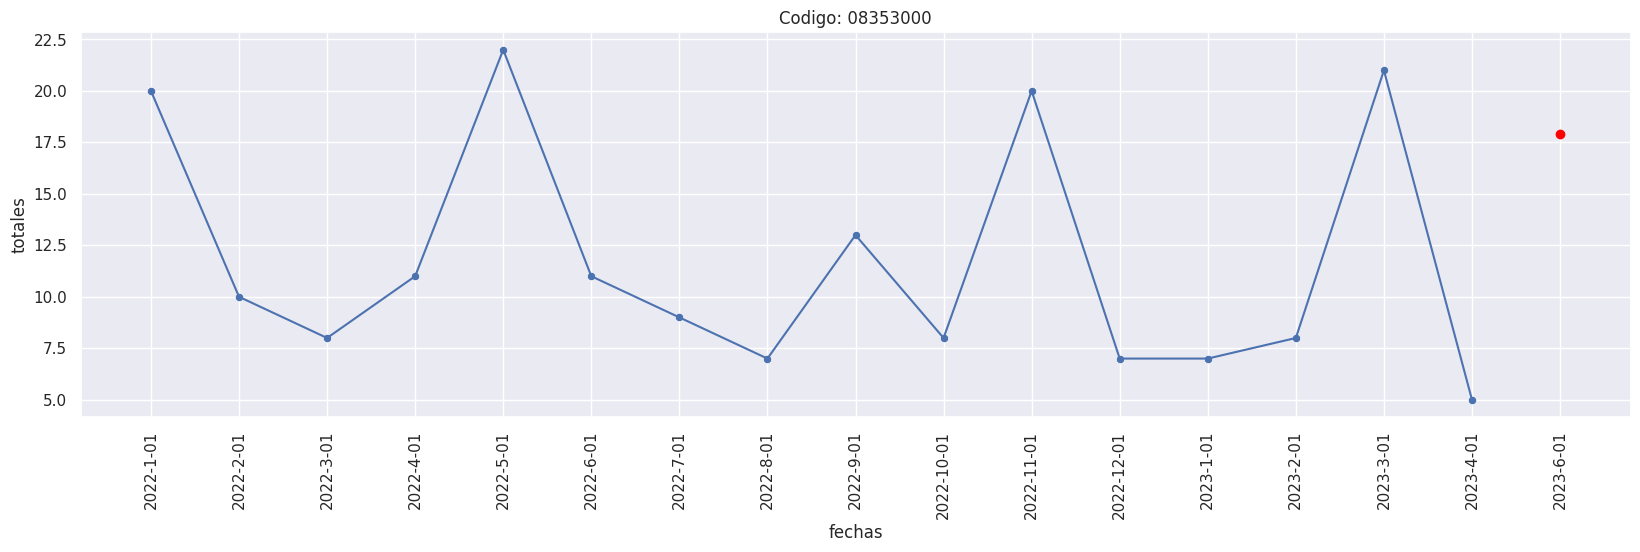

In [138]:
plt.figure(figsize=(20, 5))
sns.set(color_codes=True)
plt.xticks(rotation=90)
sns.scatterplot(x='fechas', y='totales', data=df_graf)
plt.scatter(x=(str(anio_in)+'-'+str(mes_in)+'-01'), y=pred, color='red')
plt.plot(df_graf.fechas, df_graf.totales)
plt.title("Codigo: "+codigo_in)
plt.show()